In [49]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction import FeatureHasher
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from gensim.models import Word2Vec
from arrow import now
import hashlib, nltk, struct, pickle
from random import choice, choices, randint
from datetime import datetime, timedelta
from faker import Faker
from umap import UMAP
import plotly.express as px
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /Users/theflow/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/theflow/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [50]:
fake = Faker()

categories = [
    'Rent',
    'Leasing',
    'Heating',
    'Gas, electricity, water',
    'Cleaning',
    'Maintenance of business premises',
    'Insurance',
    'Insurance for buildings',
    'Vehicle costs (gas)',
    'Travel expenses',
    'Repairs',
]

purchased_items_dict = {
    "Rent": [
        "Apartment rental",
        "House rental",
        "Room rental",
        "Office space rental",
        "Warehouse rental",
        "Storage unit rental",
        "Furniture rental",
        "Equipment rental",
        "Car rental",
        "Bike rental",
        "Short-term lease",
        "Long-term lease",
        "Furnished apartment",
        "Unfurnished apartment",
        "Shared accommodation",
        "Serviced apartment",
        "Luxury apartment",
        "Budget-friendly option",
        "Pet-friendly rental",
        "Disability access",
        "Secure parking",
        "Gym membership",
        "Pool facilities",
        "Community garden",
        "On-site laundry",
        "Package delivery"
    ],
    "Leasing": [
        "Car leasing",
        "Equipment leasing",
        "Property leasing",
        "Warehouse leasing",
        "Office space leasing",
        "Retail store leasing",
        "Restaurant leasing",
        "Cafe leasing",
        "Event venue leasing",
        "Storage unit leasing",
        "Furniture leasing",
        "Technology leasing",
        "Heavy machinery leasing",
        "Construction equipment leasing",
        "Agricultural equipment leasing",
        "Medical equipment leasing",
        "Dental equipment leasing",
        "Laboratory equipment leasing",
        "IT hardware leasing",
        "Software licensing",
        "Cloud computing services"
    ],
    "Heating": [
        "Central heating system",
        "Gas boiler",
        "Electric radiator",
        "Oil-fired boiler",
        "Solar water heater",
        "Heat pump",
        "Wood-burning stove",
        "Pellet stove",
        "Propane heater",
        "Kerosene heater",
        "Space heater",
        "Baseboard heating",
        "Radiant floor heating",
        "Hot water heating system",
        "Steam radiator",
        "Hydronic heating system",
        "Infrared heating",
        "Convection heating"
    ],
    "Gas, electricity, water": [
        "Natural gas supply",
        "Electricity supply",
        "Water supply",
        "Gas meter installation",
        "Electricity meter installation",
        "Water meter installation",
        "Utility bill management",
        "Energy efficiency audit",
        "Smart home energy monitoring",
        "Renewable energy systems",
        "Solar panel installation",
        "Wind turbine installation",
        "Geothermal heating system",
        "Rainwater harvesting system",
        "Gray water reuse system"
    ],
    "Cleaning": [
        "Residential cleaning services",
        "Commercial cleaning services",
        "Industrial cleaning services",
        "Carpet cleaning",
        "Upholstery cleaning",
        "Window cleaning",
        "Gutter cleaning",
        "Power washing",
        "Janitorial supplies",
        "Floor care products",
        "Household cleaning products",
        "Eco-friendly cleaning products",
        "Disinfecting services",
        "Sanitizing services"
    ],
    "Maintenance of business premises": [
        "Facilities management",
        "Building maintenance",
        "Equipment maintenance",
        "HVAC maintenance",
        "Plumbing maintenance",
        "Electrical maintenance",
        "Pest control services",
        "Landscaping services",
        "Snow removal services",
        "Fire suppression system maintenance",
        "Security system maintenance",
        "Access control system maintenance"
    ],
    "Insurance": [
        "Life insurance",
        "Health insurance",
        "Disability insurance",
        "Homeowners insurance",
        "Auto insurance",
        "Business insurance",
        "Liability insurance",
        "Workers' compensation insurance",
        "Umbrella insurance",
        "Cyber insurance",
        "Flood insurance",
        "Earthquake insurance"
    ],
    "Insurance for buildings": [
        "Commercial property insurance",
        "Residential property insurance",
        "Condominium insurance",
        "Townhouse insurance",
        "Apartment building insurance",
        "Office building insurance",
        "Retail store insurance",
        "Restaurant insurance",
        "Hotel insurance",
        "Vacant property insurance"
    ],
    "Vehicle costs (gas)": [
        "Gasoline",
        "Diesel fuel",
        "Alternative fuels",
        "Electric vehicle charging",
        "Hybrid vehicle maintenance",
        "Oil changes",
        "Tire rotation",
        "Brake pad replacement",
        "Air filter replacement",
        "Wiper blade replacement"
    ],
    "Travel expenses": [
        "Flight tickets",
        "Hotel reservations",
        "Car rental fees",
        "Gasoline",
        "Food and beverages",
        "Souvenirs",
        "Tips and gratuities",
        "Travel insurance",
        "Passport fees",
        "Visa fees"
    ],
    "Repairs": [
        "Home repairs",
        "Appliance repairs",
        "Furniture repairs",
        "Car repairs",
        "Bike repairs",
        "Electronics repairs",
        "Plumbing repairs",
        "HVAC repairs",
        "Roofing repairs",
        "Siding repairs"
    ]
}

country_codes = ['US', 'CA', 'MX', 'UK', 'FR', 'DE', 'IT']

# words_per_category = 50
# words_total_cnt = len(categories) * words_per_category
# print(words_total_cnt)
# words = fake.words(nb=words_total_cnt, unique=True)
# purchased_items_dict = {c: [] for c in categories}
# for i, c in enumerate(categories):
#     purchased_items_dict[c] = words[i : (i + 1) * words_per_category]

# print(purchased_items_dict)

suppliers = {c: [] for c in categories}
supplier_names = set()
for c in suppliers:
    while len(suppliers[c]) < 50:
        supplier = fake.company()
        if supplier not in supplier_names:
            supplier_names.add(supplier)
            suppliers[c].append({
                'name': supplier,
                'iban': fake.iban(),
            })

# print(suppliers)

def generate_synthetic_data(num_fixtures):
    data = []
    for _ in range(num_fixtures):
        category = choice(categories)
        supplier = choice(suppliers[category])
        # supplier_name = f'{category} Supplier {randint(1, 20)}'
        invoice_number = randint(1000, 9999)
        amount_net = round(randint(1, 100) * 10.99, 2)
        amount_gross = round(amount_net * (1 + 0.08), 2)
        tax_rate = 0.08
        purchased_items = choices(purchased_items_dict[category], k=randint(1, 3))
        # country_code = choice(country_codes)
        # iban = f'IBAN {_}'

        data.append({
            'Invoice date': datetime.now() + timedelta(days=randint(-30, 30)),
            'Supplier name': supplier['name'],
            'Invoice number': invoice_number,
            'Amount net': amount_net,
            'Amount gross': amount_gross,
            'Tax rate': tax_rate,
            'Purchased items': ', '.join(purchased_items),
            # 'Country code': country_code,
            'IBAN': supplier['iban'],
            'Category': category
        })

    return pd.DataFrame(data)

df = generate_synthetic_data(100000)
df.head()


,Invoice date,Supplier name,Invoice number,Amount net,Amount gross,Tax rate,Purchased items,IBAN,Category
0,2024-10-13 11:37:28.020195,Cruz LLC,4748,725.34,783.37,0.08,"Visa fees, Flight tickets",GB62XPLQ45681913465736,Travel expenses
1,2024-09-30 11:37:28.020210,"Bean, Weber and Matthews",6628,120.89,130.56,0.08,"Restaurant insurance, Condominium insurance",GB43MSRB89213111743060,Insurance for buildings
2,2024-09-25 11:37:28.020215,Guerrero Inc,3003,296.73,320.47,0.08,"Food and beverages, Hotel reservations",GB44VCKT24300238589802,Travel expenses
3,2024-09-28 11:37:28.020219,"Johnson, Roberts and Mckee",6033,1011.08,1091.97,0.08,Technology leasing,GB70LFUB80090236388206,Leasing
4,2024-09-09 11:37:28.020223,Reese Inc,8877,626.43,676.54,0.08,"Dental equipment leasing, IT hardware leasing,...",GB47IZKR10432089410123,Leasing


In [51]:
df['Category'].value_counts()

Category
Vehicle costs (gas)                 9204
Cleaning                            9149
Insurance                           9136
Maintenance of business premises    9125
Gas, electricity, water             9102
Heating                             9102
Rent                                9078
Insurance for buildings             9072
Travel expenses                     9060
Leasing                             9022
Repairs                             8950
Name: count, dtype: int64

In [52]:
# Apply Label Encoding to Category
le = LabelEncoder()
df['category_le'] = le.fit_transform(df['Category'])

# Define a function to compute the mean of word embeddings
def create_word2vec_embedding(model: Word2Vec, doc):
    return np.mean([model.wv[word] for word in nltk.RegexpTokenizer(r'\w+').tokenize(doc) if word in model.wv], axis=0)

# Tokenize the 'Supplier name' column
tokenized_supplier_name = df['Supplier name'].apply(lambda x: nltk.RegexpTokenizer(r'\w+').tokenize(x))
# Fit a Word2Vec model to the tokenized data
time_start = now()
word2vec_model_sn = Word2Vec(tokenized_supplier_name.tolist(), vector_size=100, window=5, min_count=1)
print(f'word2vec SN took: {now() - time_start}')

time_start = now()
df['supplier_name_we'] = [create_word2vec_embedding(word2vec_model_sn, doc) for doc in df['Supplier name']]
print(f'Vectorize SN took: {now() - time_start}')

# Tokenize the 'Purchased items' column
tokenized_purchased_items = df['Purchased items'].apply(lambda x: nltk.RegexpTokenizer(r'\w+').tokenize(x))
# Fit a Word2Vec model to the tokenized data
time_start = now()
word2vec_model_pi = Word2Vec(tokenized_purchased_items.tolist(), vector_size=100, window=5, min_count=1)
print(f'word2vec PI took: {now() - time_start}')

time_start = now()
df['purchased_items_we'] = [create_word2vec_embedding(word2vec_model_pi, doc) for doc in df['Purchased items']]
print(f'Vectorize PI took: {now() - time_start}')

# Tokenize the 'Supplier name' + 'Purchased items' column
df['supplier_n_products'] = df['Supplier name'].astype(str) + '. ' + df['Purchased items'].astype(str)
tokenized_snp = df['supplier_n_products'].apply(lambda x: nltk.RegexpTokenizer(r'\w+').tokenize(x))
# Fit a Word2Vec model to the tokenized data
time_start = now()
word2vec_model_snp = Word2Vec(tokenized_snp.tolist(), vector_size=100, window=5, min_count=1)
print(f'word2vec SnP took: {now() - time_start}')

time_start = now()
df['supplier_n_products_we'] = [create_word2vec_embedding(word2vec_model_snp, doc) for doc in df['supplier_n_products']]
print(f'Vectorize SnP took: {now() - time_start}')

# time_start = now()
# hasher = FeatureHasher(n_features=len(df['IBAN'].unique()), input_type='string')
# df['iban_hash'] = hasher.fit_transform([[x] for x in df['IBAN'].values]).toarray()
# print(f'IBAN hash took: {now() - time_start}')

df['iban_hash'] = df['IBAN'].apply(lambda x: struct.unpack(">I", hashlib.md5(x.encode("utf-8")).digest()[:4])[0])
df['iban_encoded'] = LabelEncoder().fit_transform(df['IBAN'])
# df['iban_hash'] = df['IBAN'].apply(lambda x: int(hashlib.md5(x.encode("utf-8")).hexdigest(), 16))
# df['iban_sc'] = StandardScaler().fit_transform(df[['iban_hash']])

# Scaling
# df['supplier_name_sc'] = StandardScaler().fit_transform(df['supplier_name_we'].apply(pd.Series)).tolist()
# df['purchased_items_sc'] = StandardScaler().fit_transform(df['purchased_items_we'].apply(pd.Series)).tolist()


word2vec SN took: 0:00:00.378923
Vectorize SN took: 0:00:00.746399
word2vec PI took: 0:00:00.536733
Vectorize PI took: 0:00:00.925646
word2vec SnP took: 0:00:00.927960
Vectorize SnP took: 0:00:01.179600


In [53]:
y = df['category_le']
print(y.head())

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, stratify=y)

# Combine the preprocessed features into a single dataframe

# use scaled features
# X_train_combined = pd.concat(
#     [
#         X_train['supplier_name_sc'].apply(func=pd.Series).add_prefix('supplier_'),
#         X_train['purchased_items_sc'].apply(func=pd.Series).add_prefix('items_'),
#         X_train['iban_sc'].apply(func=pd.Series).add_prefix('iban'),
#     ],
#     axis=1
# )
# X_test_combined = pd.concat(
#     [
#         X_test['supplier_name_sc'].apply(func=pd.Series).add_prefix('supplier_'),
#         X_test['purchased_items_sc'].apply(func=pd.Series).add_prefix('items_'),
#         X_test['iban_sc'].apply(func=pd.Series).add_prefix('iban'),
#     ],
#     axis=1
# )

# use "raw" features
X_train_combined = pd.concat(
    [
        # X_train['supplier_name_we'].apply(func=pd.Series).add_prefix('supplier_'),
        # X_train['purchased_items_we'].apply(func=pd.Series).add_prefix('items_'),
        X_train['supplier_n_products_we'].apply(func=pd.Series).add_prefix('snp_'),
        X_train[['iban_hash']],
        X_train[['iban_encoded']],
    ],
    axis=1
)
X_test_combined = pd.concat(
    [
        # X_test['supplier_name_we'].apply(func=pd.Series).add_prefix('supplier_'),
        # X_test['purchased_items_we'].apply(func=pd.Series).add_prefix('items_'),
        X_test['supplier_n_products_we'].apply(func=pd.Series).add_prefix('snp_'),
        X_test[['iban_hash']],
        X_test[['iban_encoded']],
    ],
    axis=1
)

0    9
1    4
2    9
3    5
4    5
Name: category_le, dtype: int64


In [54]:
X_test_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 27062 to 83712
Columns: 102 entries, snp_0 to iban_encoded
dtypes: float32(100), int64(2)
memory usage: 8.1 MB


In [55]:
X_train_combined.head()

,snp_0,snp_1,snp_2,snp_3,snp_4,snp_5,snp_6,snp_7,snp_8,snp_9,...,snp_92,snp_93,snp_94,snp_95,snp_96,snp_97,snp_98,snp_99,iban_hash,iban_encoded
13097,-0.240127,-0.046954,-0.438248,0.555352,0.658506,-0.202319,0.860914,-0.103988,-0.874820,0.442907,...,0.137899,0.223023,-0.000527,0.601077,0.632692,0.680564,0.120571,0.674007,1738553787,410
76092,-0.002540,-0.189534,0.002851,0.819149,0.162116,-0.374698,0.330519,0.196661,0.800061,-0.168052,...,0.227126,-0.052132,0.035689,-0.424379,0.476837,0.397675,-0.363186,0.628481,4151498948,444
8400,-0.309533,0.917079,0.551382,-0.585731,-0.036926,0.563134,1.024451,-0.058604,0.021969,-0.866822,...,-1.214587,-0.468459,-0.225730,-0.278000,-0.498761,0.023302,1.289503,-0.626896,1511720471,100
97386,-0.663008,0.489270,0.695094,-0.313485,-0.335357,0.102783,0.728824,-0.120717,-0.539026,-0.092000,...,-1.665591,-0.651270,0.148975,-0.004350,-0.393557,-0.460946,0.686269,0.044159,3241461840,309
41891,0.008756,0.448668,-0.168333,-0.970807,0.453662,0.228898,0.530367,0.866678,-1.401129,0.108578,...,0.888559,-0.022242,0.405177,1.386555,0.195982,-0.677873,0.438686,-0.527357,2794781671,249


In [56]:
time_start = now()
word2vec_umap_model = UMAP(n_components=3, verbose=1, init='pca', n_jobs=1)
# df[['x_sn', 'y_sn', 'z_sn']] = word2vec_umap_model.fit_transform(df['supplier_name_we'].apply(func=pd.Series))
# df[['x_pi', 'y_pi', 'z_pi']] = word2vec_umap_model.fit_transform(df['purchased_items_we'].apply(func=pd.Series))
df[['x_snp', 'y_snp', 'z_snp']] = word2vec_umap_model.fit_transform(df['supplier_n_products_we'].apply(func=pd.Series))
print(f'doc2vec umap time: {now() - time_start}')


UMAP(init='pca', n_components=3, n_jobs=1, verbose=1)
Fri Sep 13 11:37:41 2024 Construct fuzzy simplicial set
Fri Sep 13 11:37:41 2024 Finding Nearest Neighbors
Fri Sep 13 11:37:41 2024 Building RP forest with 21 trees
Fri Sep 13 11:37:42 2024 NN descent for 17 iterations
	 1  /  17
	 2  /  17
	 3  /  17
	Stopping threshold met -- exiting after 3 iterations
Fri Sep 13 11:37:46 2024 Finished Nearest Neighbor Search
Fri Sep 13 11:37:46 2024 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Fri Sep 13 11:38:22 2024 Finished embedding
doc2vec umap time: 0:00:44.471312


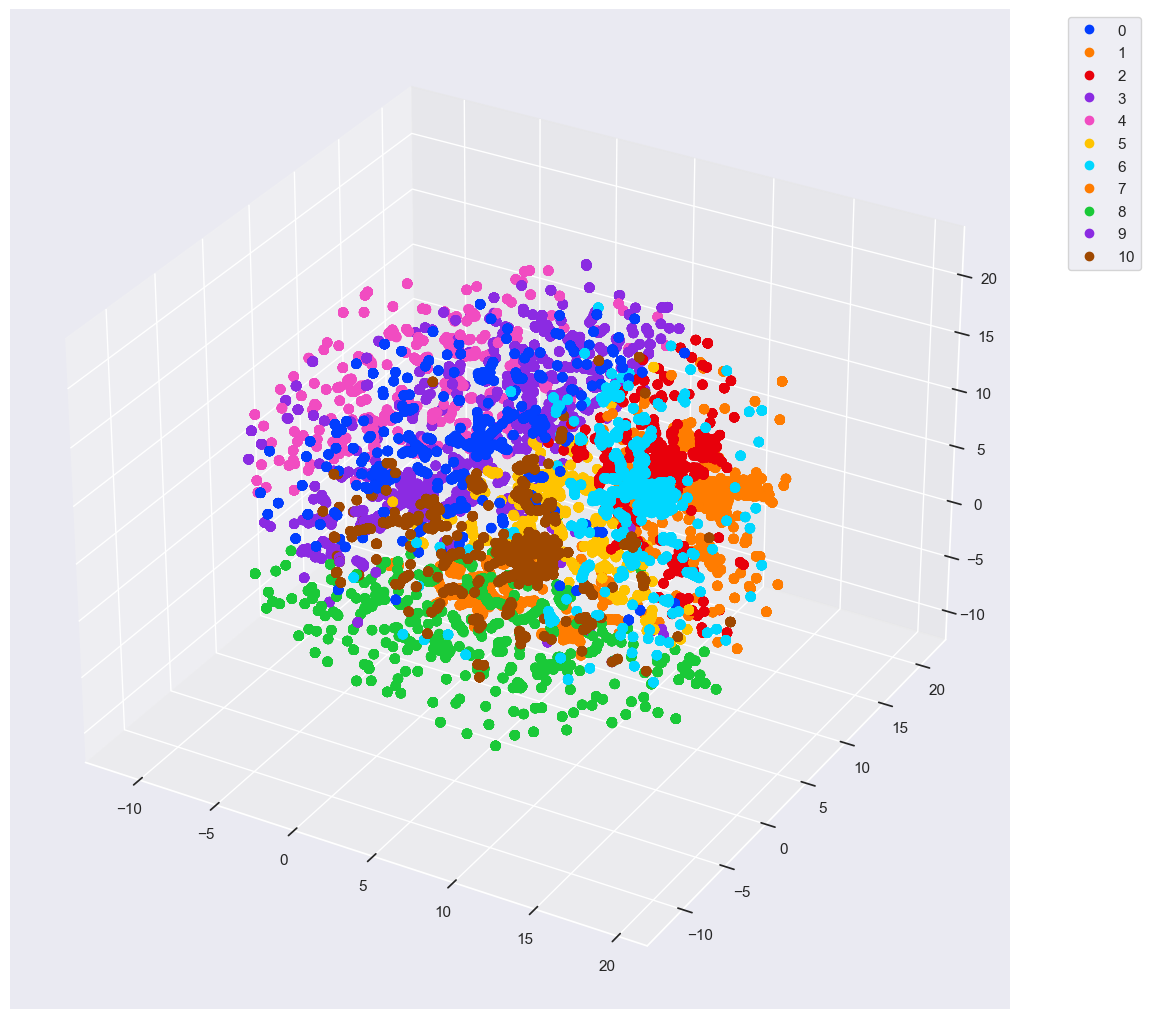

In [57]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize=(12,10))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

cmap = ListedColormap(sns.color_palette("bright", 16).as_hex())
sc = ax.scatter(df['x_snp'], df['y_snp'], df['z_snp'], s=40, c=df['category_le'], marker='o', cmap=cmap, alpha=1)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)


In [58]:
print(list(word2vec_model_sn.wv.index_to_key))
print(list(word2vec_model_pi.wv.index_to_key))

['and', 'LLC', 'Group', 'Ltd', 'PLC', 'Johnson', 'Sons', 'Inc', 'Brown', 'Jones', 'Smith', 'Williams', 'Davis', 'White', 'Taylor', 'Moore', 'Miller', 'Clark', 'Garcia', 'Wilson', 'Rodriguez', 'Edwards', 'Webb', 'Martin', 'Gomez', 'Sanchez', 'King', 'Anderson', 'Brooks', 'Lewis', 'Sullivan', 'Jackson', 'Young', 'Henderson', 'Martinez', 'Romero', 'Becker', 'Walker', 'Freeman', 'Evans', 'Long', 'Morgan', 'Foster', 'Roberts', 'Hill', 'Adams', 'Hall', 'Cruz', 'Bennett', 'Murphy', 'Ramirez', 'Griffin', 'Mckee', 'Nguyen', 'Russell', 'Gonzalez', 'Walsh', 'Gibson', 'Wright', 'Lopez', 'Harrison', 'Mitchell', 'Nelson', 'Newman', 'Green', 'Carter', 'Mccarthy', 'Watson', 'Thomas', 'Jenkins', 'Harris', 'Diaz', 'Hernandez', 'Navarro', 'Allen', 'Aguilar', 'Case', 'Dean', 'Hendricks', 'Joseph', 'Gonzales', 'Meyer', 'Ward', 'Cole', 'Gray', 'Woods', 'Wood', 'Fox', 'Morris', 'Owens', 'Ramos', 'Daniel', 'Kim', 'Steele', 'Reynolds', 'Frazier', 'Ray', 'Rivera', 'Craig', 'Baker', 'Aguirre', 'Robinson', 'Murra

In [59]:
# Train a Random Forest model using the preprocessed data
time_start = now()
print(f"Start training: {time_start}")
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined, y_train)
print(f"Training took: {now() - time_start}")

# Evaluate the model on the test set
time_start = now()
print(f"Start evaluation: {time_start}")
y_pred = rf_model.predict(X_test_combined)
score = f1_score(y_true=y_test, y_pred=y_pred, average='macro')
print(f"Evaluation took: {now() - time_start}")
print(f"Model Accuracy: {score:.3f}")

Start training: 2024-09-13T11:38:24.572336+02:00
Training took: 0:00:43.785408
Start evaluation: 2024-09-13T11:39:08.357993+02:00
Evaluation took: 0:00:00.090121
Model Accuracy: 1.000


In [60]:
# RF feature importance
feature_importances = pd.DataFrame({
    'Feature': X_test_combined.columns,
    'Importance Score': rf_model.feature_importances_
})
fig = px.bar(feature_importances, x='Feature', y='Importance Score', title='Random Forest Feature Importances')
fig.update_layout(xaxis_title='Features', yaxis_title='Importance Score')
fig.show()

In [61]:
# XGBoost on MAX CPU Cores

for n in [16, 2, 1]:
    print(f'# XGBoost on {n} CPU Cores')
    print('-'*30)
    bst = XGBClassifier(device='cpu', n_jobs=n)

    time_start = now()
    print(f"Start training: {time_start}")
    bst.fit(X_train_combined.drop(columns=['iban_hash']), y_train)
    print(f"Training took: {now() - time_start}")

    time_start = now()
    print(f"Start evaluation: {time_start}")
    y_pred = bst.predict(X_test_combined.drop(columns=['iban_hash']))
    score = f1_score(y_true=y_test, y_pred=y_pred, average='macro')
    print(f"Evaluation took: {now() - time_start}")
    print(f"Model F1-score (macro): {score:.3f}")
    print()

# XGBoost on 16 CPU Cores
------------------------------
Start training: 2024-09-13T11:39:08.537821+02:00
Training took: 0:00:03.073522
Start evaluation: 2024-09-13T11:39:11.611468+02:00
Evaluation took: 0:00:00.024975
Model F1-score (macro): 1.000

# XGBoost on 2 CPU Cores
------------------------------
Start training: 2024-09-13T11:39:11.636843+02:00
Training took: 0:00:07.056452
Start evaluation: 2024-09-13T11:39:18.693430+02:00
Evaluation took: 0:00:00.063189
Model F1-score (macro): 1.000

# XGBoost on 1 CPU Cores
------------------------------
Start training: 2024-09-13T11:39:18.757121+02:00
Training took: 0:00:13.748292
Start evaluation: 2024-09-13T11:39:32.505554+02:00
Evaluation took: 0:00:00.101333
Model F1-score (macro): 1.000



In [62]:
print(bst.predict_proba(X_test_combined.drop(columns=['iban_hash']).iloc[0].values.reshape(1, -1)))

[[1.7616703e-06 1.9483109e-06 1.7566608e-06 2.0240841e-06 3.0260640e-06
  9.9998128e-01 2.5410159e-06 2.1720577e-06 2.0511413e-06 5.9030066e-07
  8.7275737e-07]]


In [63]:
# XGBoost feature importance
feature_importances = pd.DataFrame({
    'Feature': X_test_combined.drop(columns=['iban_hash']).columns,
    'Importance Score': bst.feature_importances_
})
fig = px.bar(feature_importances, x='Feature', y='Importance Score', title='XGBoost Feature Importances')
fig.update_layout(xaxis_title='Features', yaxis_title='Importance Score')
fig.show()

In [64]:
# Train a KNN model
time_start = now()
print(f"Start training: {time_start}")
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_combined, y_train)
print(f"Training took: {now() - time_start}")

# Evaluate the model
time_start = now()
print(f"Start evaluation: {time_start}")
score = knn_model.score(X_test_combined, y_test)
print(f"Evaluation took: {now() - time_start}")
print(f"Model Accuracy: {score:.3f}")

Start training: 2024-09-13T11:39:32.679283+02:00
Training took: 0:00:00.036669
Start evaluation: 2024-09-13T11:39:32.716169+02:00
Evaluation took: 0:00:00.987289
Model Accuracy: 1.000


In [65]:
print('Model size:')
print(f'RF: {len(pickle.dumps(rf_model)) / (1024 ** 2):.2f} Mb')
print(f'KNN: {len(pickle.dumps(knn_model)) / (1024 ** 2):.2f} Mb')
print(f'XGBoost: {len(pickle.dumps(bst)) / (1024 ** 2):.2f} Mb')

Model size:
RF: 9.28 Mb
KNN: 62.87 Mb
XGBoost: 1.02 Mb
